### <center> Introduction aux chaînes de Markov, Simulation python3</center>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns

## Partie I

### Question 1

In [3]:
def trajectory(P,  startingpoint,  steps):
    """
    Print the trajectory followed by the Markov chain with transition matrix
    Pandstarting from the startingpoint in steps number of steps
    Args:
        P (array): the transition matrix,
        startingpoint (int),
        steps (int)
    Returns:
            X (list)
    """
    X = []
    state = startingpoint
    
    for k in range(steps):
        state = np.random.choice(a=range(len(P)), p=P[state])
        X.append(state)
        
    return X

In [4]:
P = np.array([[0.6, 0.4], [1, 0]])
startingpoint = 0
steps = 20 
trajectory(P,  startingpoint,  steps)

[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

### Question 2

In [5]:
P = np.array([[0.6, 0.4], [1, 0]])
startingpoint = 1
steps = 20 # For 20 steps
trajectory(P,  startingpoint,  steps)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [6]:
P = np.array([[0.6, 0.4], [1, 0]])
startingpoint = 0
steps = 50 # For 50 steps
trajectories = trajectory(P,  startingpoint,  steps)

In [7]:
P = np.array([[0.6, 0.2, 0.2], [0.4, 0, 0.6], [0, 0.8, 0.2]])
startingpoint = 0
steps = 200 # For 200 steps
trajectories = trajectory(P,  startingpoint,  steps)

In [8]:
P = np.array([[0, 0 , 0.5, 0.5], [0.6, 0.4, 0, 0], [0, 0.2, 0.8, 0], [0, 0.1, 0.9, 0]])
startingpoint = 0
steps = 10
trajectory(P,  startingpoint,  steps)

[3, 2, 2, 1, 0, 2, 2, 2, 1, 1]

In [9]:
P = np.array([[0, 0 , 0.5, 0.5], [0.6, 0.4, 0, 0], [0, 0.2, 0.8, 0], [0, 0.1, 0.9, 0]])
startingpoint = 0
steps = 50 # For 20 steps
trajectories = trajectory(P,  startingpoint,  steps)

In [10]:
P = np.array([[0, 0 , 0.5, 0.5], [0.6, 0.4, 0, 0], [0, 0.2, 0.8, 0], [0, 0.1, 0.9, 0]])
startingpoint = 0
steps = 200 # For 200 steps
trajectories = trajectory(P,  startingpoint,  steps)

### Question 3

In [11]:
def stationary_station_solve(P):
    """
     Finding the stationary distributions using the appropriate numpy methods
     Args:
         P (np.matrix): the transition matrix
    Returns:
        PI (list): the tationary distributions
    """
    A = (P - np.eye(len(P))).T
    
    A = np.append(A, [np.ones(len(A))], axis=0)
    Q, R = np.linalg.qr(A)   # Décomposition QR, Q matrice orthogonale et R inversible
    R_1 = np.linalg.inv(R)
    B = np.zeros(len(A))   # Second du système à résoudre
    B[-1] = 1 # Ajout de la valeur de PI1 + .. = 1
    PI = np.dot(R_1, np.dot(Q.T, B)) # Résolution de PI*P = PI
    
    return PI

In [12]:
P = np.array([[0.6, 0.4], [1, 0]])
stationary_station_solve(P), sum(stationary_station_solve(P))

(array([0.71428571, 0.28571429]), 1.0)

In [13]:
P = np.array([
    [ 0.2, 0.6, 0.2],
    [0.1, 0, 0.9],
    [0, 0.5, 0.5]
])

stationary_station_solve(P)

array([0.04201681, 0.33613445, 0.62184874])

In [14]:
P = np.array([[0.6, 0.2, 0.2], [0.4, 0, 0.6], [0, 0.8, 0.2]])
stationary_station_solve(P), sum(stationary_station_solve(P))

(array([0.33333333, 0.33333333, 0.33333333]), 1.0)

In [15]:
P = np.array([[0, 0 , 0.5, 0.5], [0.6, 0.4, 0, 0], [0, 0.2, 0.8, 0], [0, 0.1, 0.9, 0]])
stationary_station_solve(P), sum(stationary_station_solve(P))

(array([0.12631579, 0.21052632, 0.6       , 0.06315789]), 1.0)

### Question 4

In [16]:
def random_walk(P, startingpoint, steps):
    """
    Random walk starting from the startingpoint
    as teps Numbers of steps and returns an array of frequency
    of the visits of each node
    Args:
        P (array): the transition matrix,
        startingpoint (int),
        steps (int)
    Returns:
            frequency (dictory)
    
    """
    
    frequency = {}
    trajectories = trajectory(P,  startingpoint,  steps)
    trajectories.sort()
    states = [state for state in range(len(P))]
    
    for state in states:
        state_counter = 0
        for state_traj in trajectories:
            if state == state_traj:
                state_counter +=1
        frequency[f'frenquency of {state}'] = state_counter/steps
        
    return frequency

In [17]:
P = np.array([[0, 0 , 0.5, 0.5], [0.6, 0.4, 0, 0], [0, 0.2, 0.8, 0], [0, 0.1, 0.9, 0]])
startingpoint = 1
steps = 1000
random_walk(P,  startingpoint,  steps)

{'frenquency of 0': 0.137,
 'frenquency of 1': 0.241,
 'frenquency of 2': 0.549,
 'frenquency of 3': 0.073}

### Question 5

In [18]:
def return_time(P, node):
    """
    Run a random walk in the Markov chain the return time of the node
    Args:
        P (array): the transition matrix,
        node (int),
    Returns:
            number_time (int)
    """
    number_time = 0
    walk = np.random.choice(a=range(len(P)), p=P[node])
    while walk != node:
        walk = np.random.choice(a=range(len(P)), p=P[walk])
        
        number_time+=1
            
    return number_time+1

In [30]:
P = np.array([[0, 0 , 0.5, 0.5], [0.6, 0.4, 0, 0], [0, 0.2, 0.8, 0], [0, 0.1, 0.9, 0]])
node = 2
return_time(P, node)

3

### Question 6

In [31]:
def return_time_states(P, steps):
    """
    Estimate the expected first return time using a big number of random walks starting at each node
    Args:
        P (array): the transition matrix,
        steps (int),
    Returns:
            return_means (list)
    """
    
    states = [x for x in range(len(P))]
    return_means = []
    for state in states:
        number_time = 0
        for _ in range(steps):
            number_time +=return_time(P, state)
        return_means.append(number_time/steps)
    return return_means

In [32]:
steps = 1000
return_time_states(P, steps)

[8.011, 4.636, 1.648, 16.7]

## Partie II


### Question 7

In [33]:
def random_walk(x, y, steps):
    """
    The coordinates of the points at the end of the random walk
    Args:
         x (int),
         y (int),
         steps (int)
    Returns:
           coordinates[-1] (tuple): The coordinates of the points at the end of the random walk  
    """
    
    coordinates = [(x, y)]
    walk_possibilities = [(0, 1), (0, -1), (-1, 0), (1, 0)]
    
    state_x, state_y = (x, y)
    
    for step in range(steps):
        k = rnd.choice(walk_possibilities)
        state_x, state_y = state_x + k[0], state_y + k[1]
        coordinates.append((state_x, state_y))
        
    return coordinates[-1]

In [34]:
steps = 100
x =  0
y = 0
last_position = random_walk(x, y, steps)
last_position

(-4, 0)

### Question 8

In [35]:
def random_whole_walk(x, y, steps):
    """
    Drawing the simulation of random walk for a numberof steps = 1000, and starting from the origin (0,0)
    Args:
         x (int),
         y (int),
         steps (int)
    Returns:
           coordinates[-1] (tuple): coordinates representing of the random walk for a numberof steps  
    """
    
    positions = [(x, y)]
    walk_possibilities = [(0, 1), (0, -1), (-1, 0), (1, 0)]
    state_x, state_y = (x, y)
    
    for step in range(steps):
        move_position = rnd.choice(walk_possibilities)
        
        state_x, state_y = state_x + move_position[0], state_y + move_position[1]
        positions.append((state_x, state_y))
        
    return positions

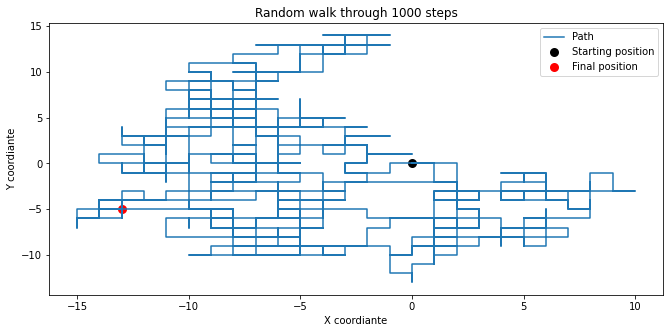

In [39]:
steps = 1000
x =  0
y = 0
coordinates = random_whole_walk(x, y, steps)

position_x, position_y = [pos[0] for pos in coordinates], [pos[1] for pos in coordinates]

plt.figure(figsize=(11, 5))
plot = plt.plot(
    position_x,
    position_y,
    label="Path",
)
plot1 = plt.scatter(
    position_x[0],
    position_y[0],
    color='black',
    label="Starting position",
    linewidths=3,
)
plt2 = plt.scatter(
    position_x[-1],
    position_y[-1],
    color='red',
    label="Final position",
    linewidths=3
)
plt.title(f"Random walk through {steps} steps")
plt.xlabel("X coordiante")
plt.ylabel("Y coordiante")
plt.legend()
plt.show()

### Question 9

In [40]:
def random_whole_walk_hit_rectangle(x, y):
    """
    Drawing the simulation of walk inside the rectangle of dimension (100,  80) with the origin
    at the centre of rectangle,  the walks tarts from the origin and it ends until it hits the wall
    Args:
        x (int),
        y (int),
    Returns:
            positions (list): coordinates representing of the random walk until it hits the walls
    """
    
    positions = [(x, y)]
    walk_possibilities = [(0, 1), (0, -1), (-1, 0), (1, 0)]
    alpha = 1

    state_x, state_y = (x, y)
    
    while alpha != 0:
        
        walk = rnd.choice(walk_possibilities)
        state_x, state_y = state_x + walk[0], state_y + walk[1]
        positions.append((state_x, state_y))
        
        if state_x == 0 or state_y == 0:
            alpha = 0
        elif state_x == 100 or state_y == 80:
            alpha = 0
            
    return positions

In [41]:
width, height = (100, 80)
x, y = (width/2, height/2)
random_walk_hit_wall = random_whole_walk_hit_rectangle(x, y)

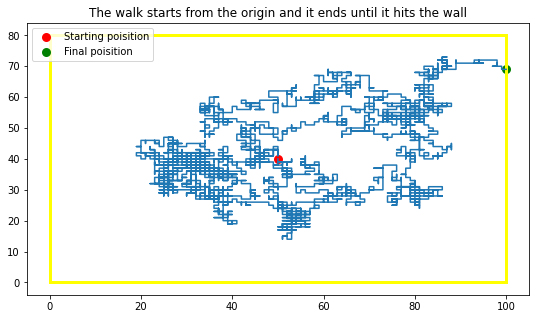

(100.0, 69.0)

In [42]:
from matplotlib.patches import Rectangle

width, height = (100, 80)
fig, ax = plt.subplots(figsize=(9, 5))

x =  width/2
y = height/2

coordinates = random_whole_walk_hit_rectangle(x, y)
position_x, position_y = [cord[0] for cord in coordinates], [cord[1] for cord in coordinates]

ax.add_patch(Rectangle(
    (0, 0), width, height,edgecolor = 'yellow',
    facecolor = 'blue',
    fill=False,
    lw=3)
)

ax.plot(position_x, position_y)

ax.scatter(x, y, c='r', label='Starting poisition', linewidths=3)
ax.scatter(position_x[-1], position_y[-1], c='g', label='Final poisition', linewidths=3)

plt.title("The walk starts from the origin and it ends until it hits the wall")
plt.legend()
plt.show()
position_x[-1], position_y[-1]

### Question 10

In [43]:
def output_elapsed_number_steps(x, y):
    """
    Output the elapsed the time(the number of steps) ofa random walk starting at the point (x,y) 
    until it hits the walls.
    Args:
        x (int),
        y (int),
    Returns:
            number_steps (int):the number of stpes
    """
    walk_possibilities = [(0, 1), (0, -1), (-1, 0), (1, 0)]
    alpha = 1
    number_steps = 0
    state_x, state_y = (x, y)
    
    while alpha != 0:
        
        walk = rnd.choice(walk_possibilities)
        state_x, state_y = state_x + walk[0], state_y + walk[1]
        number_steps +=1
        
        if state_x == 0 or state_y == 0:
            alpha = 0
        elif state_x == 100 or state_y == 80:
            alpha = 0
            
    return number_steps

In [44]:
x, y = width/2, height/2
output_elapsed_number_steps(x, y)

1649

### Question 11

In [45]:
def output_number_double_width_height(x, y, width, height):
    """
    Output the elapsed the time(the number of steps) ofa random walk starting at the point (x,y) 
    until it hits the walls.
    Args:
        x (int),
        y (int),
        width (int), 
        height (int),
    Returns:
            number_steps (int):the number of stpes

    """
    walk_possibilities = [(0, 1), (0, -1), (-1, 0), (1, 0)]
    alpha = 1
    number_steps = 0
    state_x, state_y = (x, y)
    
    while alpha != 0:
        
        walk = rnd.choice(walk_possibilities)
        state_x, state_y = state_x + walk[0], state_y + walk[1]
        number_steps +=1
        
        if state_x == 0 or state_y == 0:
            alpha = 0
        elif state_x == 200 or state_y == 160:
            alpha = 0
            
    return number_steps

In [46]:
width, height = 200, 160
x, y = width/2, height/2
output_number_double_width_height(x, y, width, height)

12522

<strong>Le nombre de steps (transitions) varie en fonction des dimensions du rectangle bien que cela reste aléatoire.</strong>